In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [3]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        with open(os.path.join(dir, file.name), 'rb') as input_file:
            value = pickle.load(input_file)
        set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)              

{'leap': {'320': [35.90566945075989, 35.89224290847778, 35.885963916778564, 35.86965727806091, 35.89757943153381, 35.87193274497986, 35.87343907356262, 35.89310598373413, 35.87635159492493, 35.90153098106384, 35.904452323913574, 35.89368391036987, 35.89583897590637, 35.932730197906494, 35.89443564414978, 35.907557010650635, 35.87612295150757, 35.873146295547485, 35.85060667991638, 35.931053161621094, 35.878055572509766, 35.8718147277832, 35.900383710861206, 35.90010619163513, 35.85425567626953, 36.00013089179993, 35.878430128097534, 35.869850158691406, 35.88355302810669, 35.88322114944458, 35.8742151260376, 35.868515968322754, 35.9034161567688, 35.89575743675232, 35.899200201034546, 35.88093662261963, 35.86923837661743, 35.861438274383545, 35.852824687957764, 35.875853300094604, 35.86750602722168, 35.85716462135315, 35.83012628555298, 35.88217115402222, 35.89680075645447, 35.85085725784302, 35.85794115066528, 35.85899996757507, 35.854756116867065, 35.859957695007324, 35.907209634780884

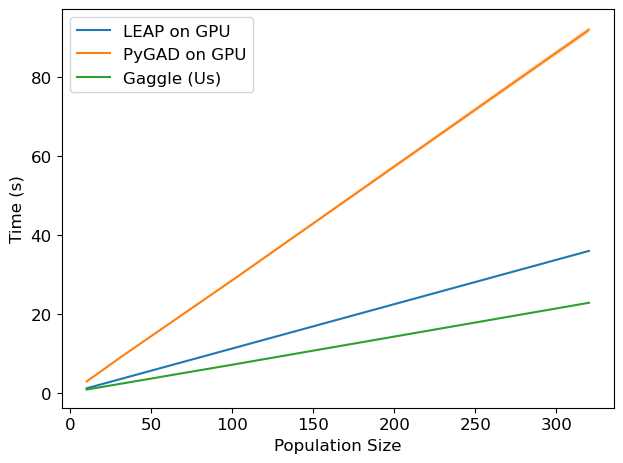

<Figure size 640x480 with 0 Axes>

In [6]:
pop_sizes = [10, 32, 100, 320]#, 1000]
plt.rcParams.update({'font.size': 12})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP on GPU', 'pygad': 'PyGAD on GPU'}
for algorithm in CI_dict:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in pop_sizes]
    lower = [result[str(x)][1] for x in pop_sizes]
    upper = [result[str(x)][2] for x in pop_sizes]
    plt.plot(pop_sizes, values, label=nice_names[algorithm])
    plt.fill_between(pop_sizes, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Population Size")
plt.ylabel("Time (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/mnist_plot.png', bbox_inches='tight')
plt.show()
plt.clf()